<a href="https://colab.research.google.com/github/Naufall1/PCVK_Ganjil_2024/blob/main/PCVK_Week9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nama  : Muhammad Naufal Kurniawan ✅ <br>
Kelas : TI-3C [18] <br>
NIM   : 2241720214 <br>

# Modul 9 - Morfologi

## Import folder yang ada di Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Import beberapa library yang dibutuhkan

In [ ]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

## Structuring Element Dilasi (SED) berbentuk cross 3 x 3 tanpa menggunakan library morphology dari openCV

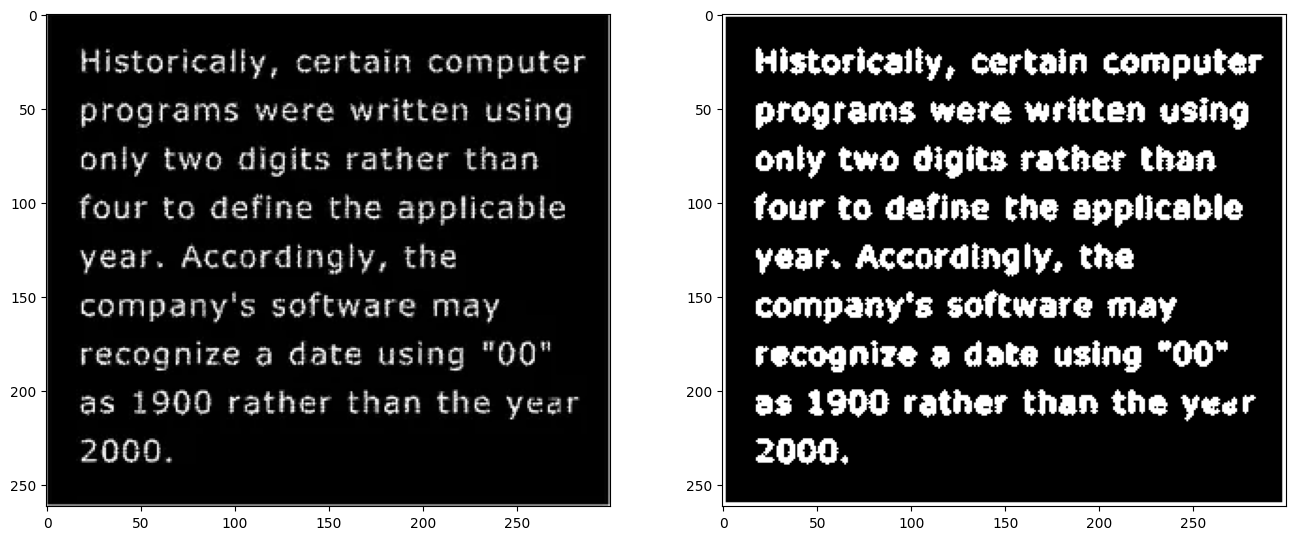

In [ ]:
image = cv.imread('/content/drive/MyDrive/Colab Notebooks/PCVK/images/morphology.png')
image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
img_fig, img_axs = plt.subplots(1, 2, figsize=(16, 8))

img_axs[0].imshow(image, cmap='gray')

def dilasi(image, kernel):
    kernel = np.array(kernel)
    image_h, image_w = image.shape
    kernel_h, kernel_w = kernel.shape

    pad_h =  kernel_h // 2
    pad_w =  kernel_w //2

    image = np.pad(image, ((pad_h, pad_w), (pad_h, pad_w)))
    output = np.zeros((image_h, image_w))

    for y in range(0, image_h):
        for x in range(0, image_w):
            region = image[
                y : y + kernel_h,
                x : x + kernel_w
                ]

            res = region * kernel

            if np.max(res):
              output[y,x] = 1

    return output

dl = np.array([
    [0,1,0],
    [1,1,1],
    [0,1,0],
], dtype=np.uint8)

image = image > 128
res = dilasi(image, dl)
img_axs[1].imshow(res, cmap='gray')


In [ ]:
k = np.array([
    [0,1,1],
    [0,1,1],
    [1,1,1],
    [1,1,1],
    [1,1,1],
    [1,1,1],
    [1,1,1],
])
k.shape[0]//2
# not np.any((k & dilasi) ^ dilasi)

3

## Structuring Element Dilasi (SED) berbentuk cross 3 x 3 dengan menggunakan library morphology dari openCV

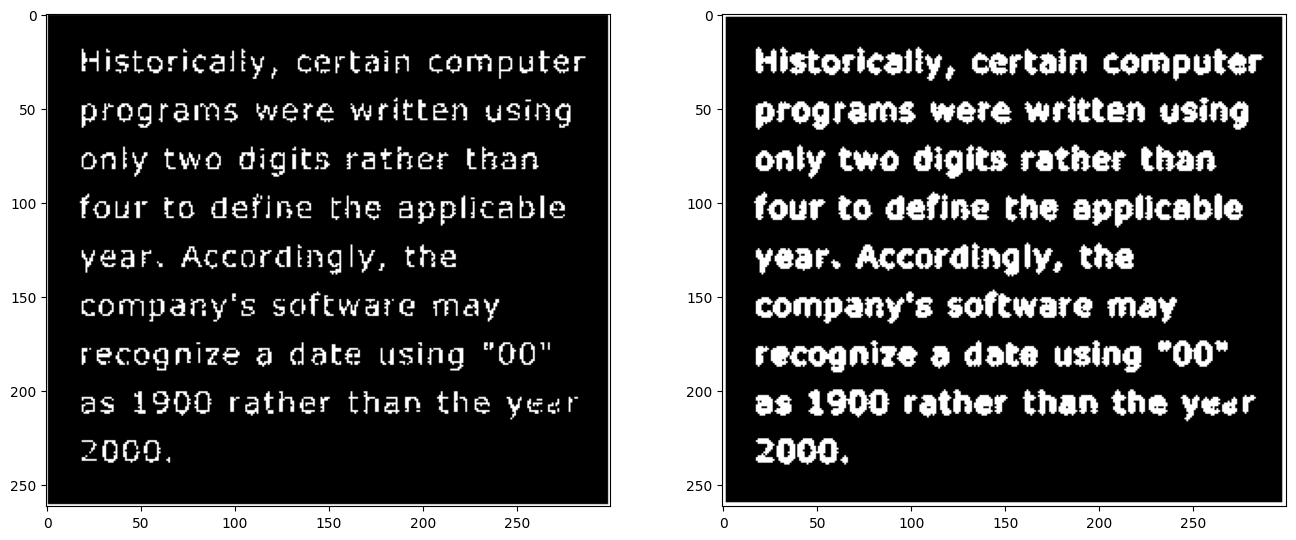

In [ ]:
img_fig, img_axs = plt.subplots(1, 2, figsize=(16, 8))

image = np.array(image, np.uint8)

img_axs[0].imshow(image, cmap='gray')

res = cv.dilate(image, dilasi, iterations=1)
img_axs[1].imshow(res, cmap='gray')

## Buatlah fungsi erosi serta tampilkan hasil erosi pada citra dengan Structuring Element Erosi (SE) berbentuk square 5 x 5 tanpa menggunakan library morphology dari openCV

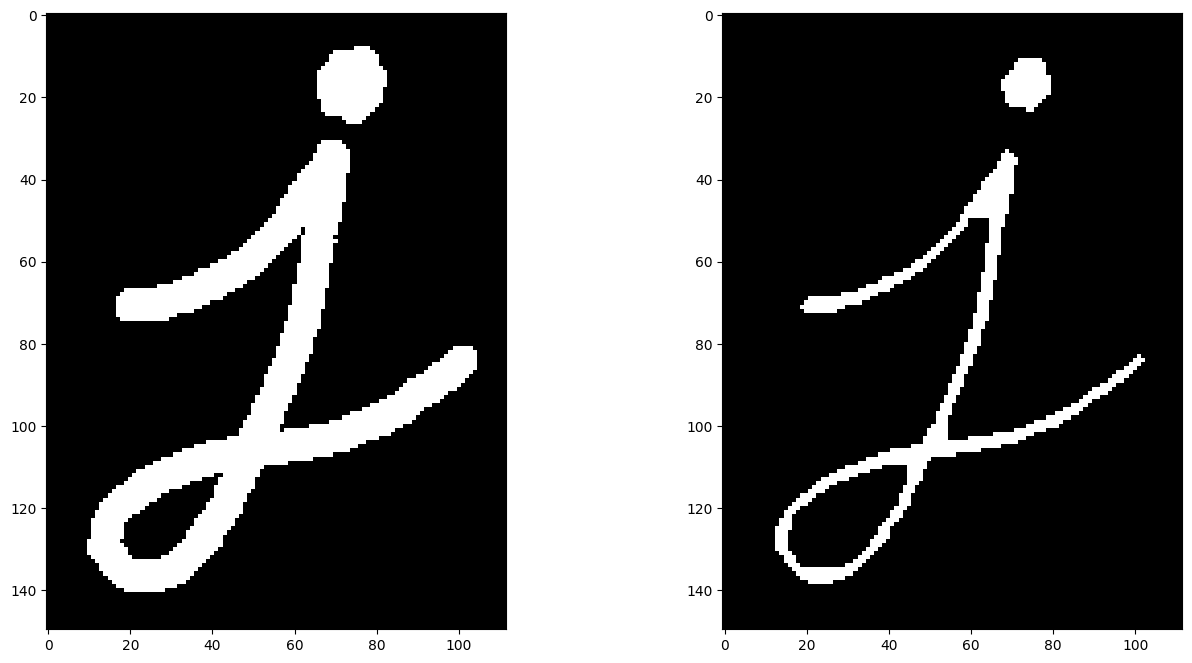

In [ ]:
image = cv.imread('/content/drive/MyDrive/Colab Notebooks/PCVK/images/j.png')
image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
img_fig, img_axs = plt.subplots(1, 2, figsize=(16, 8))

img_axs[0].imshow(image, cmap='gray')

def erosi(image, kernel):
    kernel = np.array(kernel)
    image_h, image_w = image.shape
    kernel_h, kernel_w = kernel.shape

    pad_h =  kernel_h // 2
    pad_w =  kernel_w //2

    image = np.pad(image, ((pad_h, pad_h), (pad_w, pad_w)))

    output = np.zeros((image_h, image_w))

    for y in range(0, image_h):
        for x in range(0, image_w):
            region = image[
                y : y + kernel_h,
                x : x + kernel_w
                ]
            res = region * kernel

            if not np.any((region & kernel) ^ kernel):
              output[y,x] = 1
        # break

    return output

se = np.array([
    [1, 1, 1, 1, 1],
    [1, 1, 1, 1, 1],
    [1, 1, 1, 1, 1],
    [1, 1, 1, 1, 1],
    [1, 1, 1, 1, 1],
], dtype=np.uint8)

image = image > 128
res = erosi(image, se)
img_axs[1].imshow(res, cmap='gray')

## Buatlah program implementasi operasi dilasi Structuring Element Erosi (SE) berbentuk square 5 x 5 dengan menggunakan library morphology dari openCV

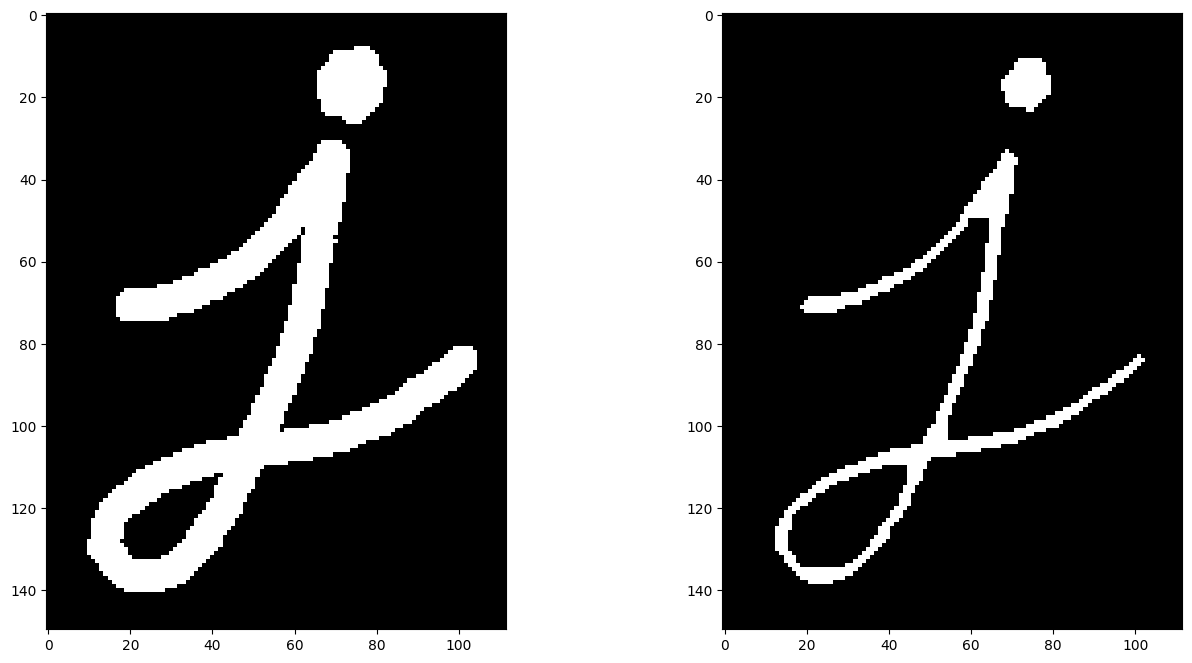

In [ ]:
image = cv.imread('/content/drive/MyDrive/Colab Notebooks/PCVK/images/j.png')
image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
img_fig, img_axs = plt.subplots(1, 2, figsize=(16, 8))

img_axs[0].imshow(image, cmap='gray')

image = np.array(image, dtype=np.uint8)

res = cv.erode(image, se, iterations=1)
img_axs[1].imshow(res, cmap='gray')


## Buatlah program implementasi operasi opening dengan Structuring Element berbentuk square 3 x 3 tanpa dan dengan menggunakan library morphology dari openCV

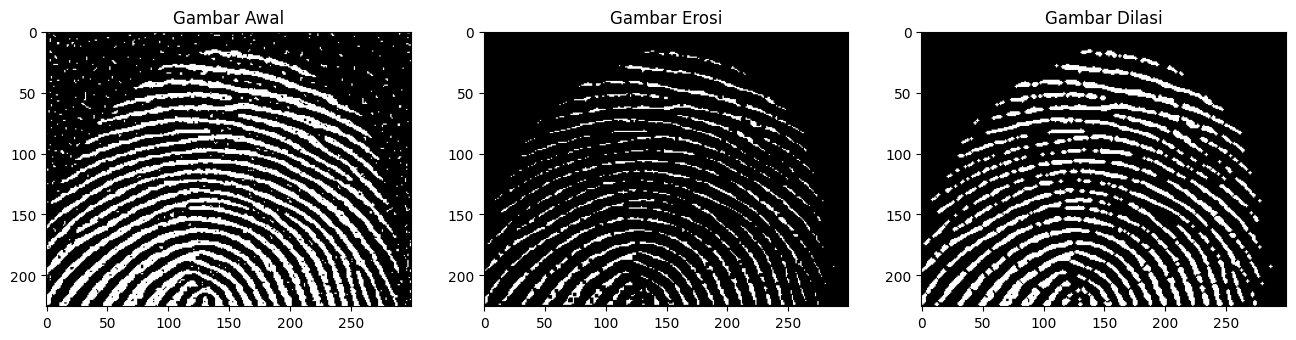

In [ ]:
image = cv.imread('/content/drive/MyDrive/Colab Notebooks/PCVK/images/fingerprint.png')
image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
image = image > 128

se_kernel = np.array([
    [1,1,1],
    [1,1,1],
    [1,1,1]
])

img_fig, img_axs = plt.subplots(1, 3, figsize=(16, 8))

img_axs[0].set_title('Gambar Awal')
img_axs[0].imshow(image, cmap='gray')

res_erode = erosi(image, se_kernel)
img_axs[1].set_title('Gambar Erosi')
img_axs[1].imshow(res_erode, cmap='gray')

res_dilasi = dilasi(res_erode, dl)
img_axs[2].set_title('Gambar Dilasi')
img_axs[2].imshow(res_dilasi, cmap='gray')

## Buatlah program implementasi operasi closing dengan Structuring Element berbentuk square 3 x 3 tanpa dan dengan menggunakan library morphology dari openCV

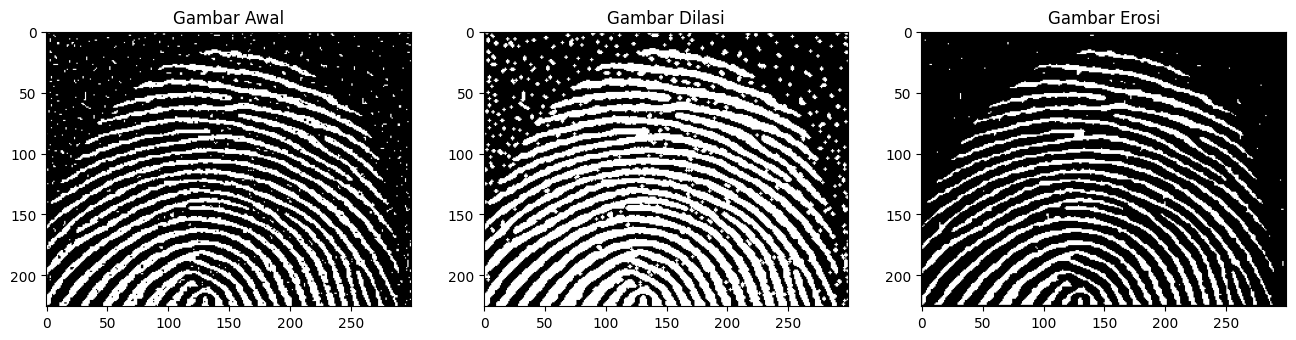

In [ ]:
image = cv.imread('/content/drive/MyDrive/Colab Notebooks/PCVK/images/fingerprint.png')
image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
image = image > 128

se_kernel = np.array([
    [1,1,1],
    [1,1,1],
    [1,1,1]
])

img_fig, img_axs = plt.subplots(1, 3, figsize=(16, 8))

img_axs[0].set_title('Gambar Awal')
img_axs[0].imshow(image, cmap='gray')

res_dilasi = dilasi(image, dl)
img_axs[1].set_title('Gambar Dilasi')
img_axs[1].imshow(res_dilasi, cmap='gray')

res_erode = erosi(res_dilasi > 0, se_kernel)
img_axs[2].set_title('Gambar Erosi')
img_axs[2].imshow(res_erode, cmap='gray')


## Buatlah program implementasi operasi dilasi dengan Structuring Element berbentuk Cross 3 x 3 dan 5 x 5

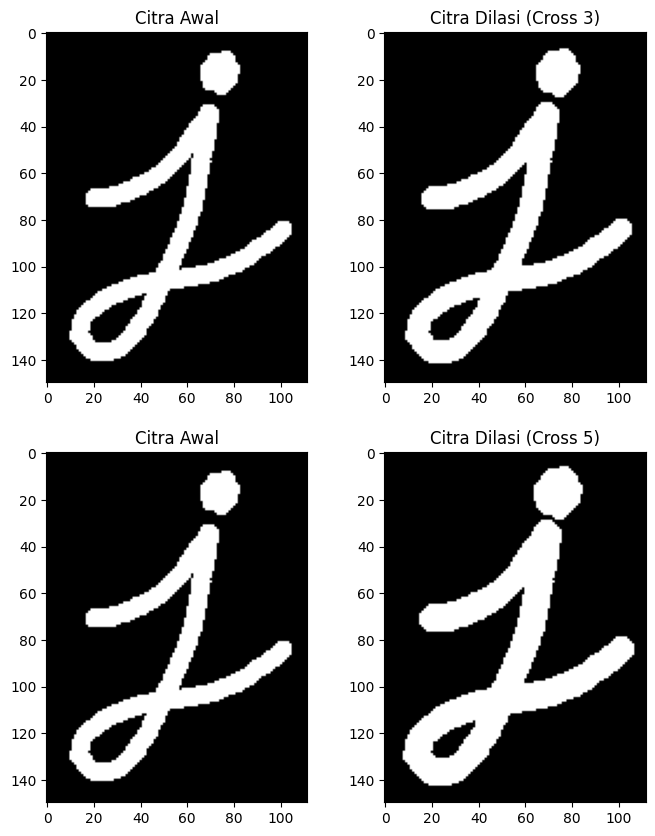

In [ ]:
image = cv.imread('/content/drive/MyDrive/Colab Notebooks/PCVK/images/j.png')
image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
img_fig, img_axs = plt.subplots(2, 2, figsize=(8, 10))

cross_3 = np.array([
    [0, 1, 0],
    [1, 1, 1],
    [0, 1, 0],
], dtype=np.uint8)

cross_5 = np.array([
    [0, 0, 1, 0, 0],
    [0, 0, 1, 0, 0],
    [1, 1, 1, 1, 1],
    [0, 0, 1, 0, 0],
    [0, 0, 1, 0, 0],
], dtype=np.uint8)

img_axs[0][0].imshow(image, cmap='gray')
img_axs[0][0].set_title('Citra Awal')

img_axs[0][1].set_title('Citra Dilasi (Cross 3)')
res_dilasi = dilasi(image, cross_3)
img_axs[0][1].imshow(res_dilasi, cmap='gray')

img_axs[1][0].set_title('Citra Awal')
img_axs[1][0].imshow(image, cmap='gray')

img_axs[1][1].set_title('Citra Dilasi (Cross 5)')
res_dilasi = dilasi(image, cross_5)
img_axs[1][1].imshow(res_dilasi, cmap='gray')

## Buatlah program implementasi operasi dilasi dengan Structuring Element berbentuk Circular 3 x 3 dan 5 x 5

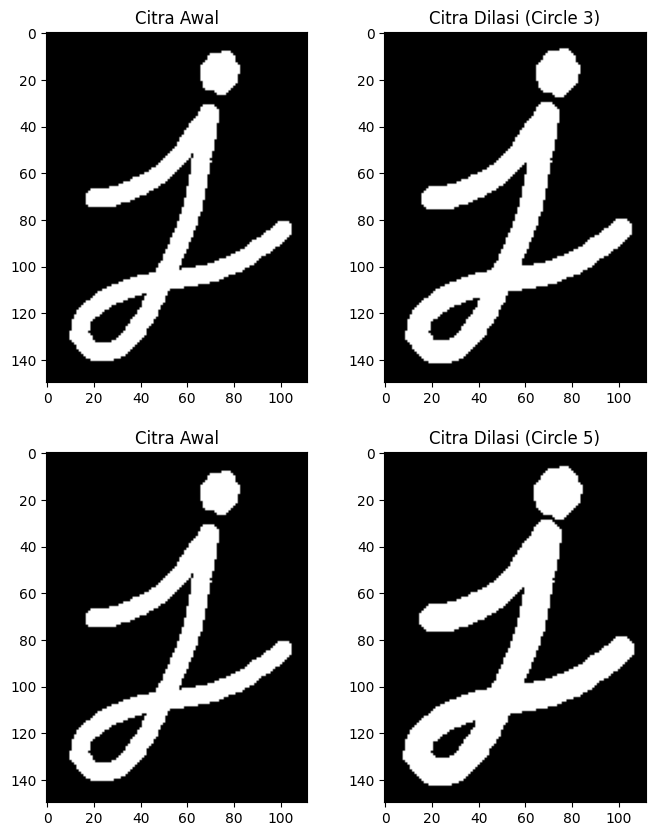

In [ ]:
image = cv.imread('/content/drive/MyDrive/Colab Notebooks/PCVK/images/j.png')
image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
img_fig, img_axs = plt.subplots(2, 2, figsize=(8, 10))

circle_3 = np.array([
    [0, 1, 0],
    [1, 1, 1],
    [0, 1, 0],
], dtype=np.uint8)

circle_5 = np.array([
    [0, 0, 1, 0, 0],
    [0, 1, 1, 1, 0],
    [1, 1, 1, 1, 1],
    [0, 1, 1, 1, 0],
    [0, 0, 1, 0, 0],
], dtype=np.uint8)

img_axs[0][0].imshow(image, cmap='gray')
img_axs[0][0].set_title('Citra Awal')

img_axs[0][1].set_title('Citra Dilasi (Circle 3)')
res_dilasi = dilasi(image, circle_3)
img_axs[0][1].imshow(res_dilasi, cmap='gray')

img_axs[1][0].set_title('Citra Awal')
img_axs[1][0].imshow(image, cmap='gray')

img_axs[1][1].set_title('Citra Dilasi (Circle 5)')
res_dilasi = dilasi(image, circle_5)
img_axs[1][1].imshow(res_dilasi, cmap='gray')

## Buatlah program implementasi operasi erosi dengan Structuring Element berbentuk Rectangle 3 x 5 dan 5 x 7

[[1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]]

[[1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1.]]


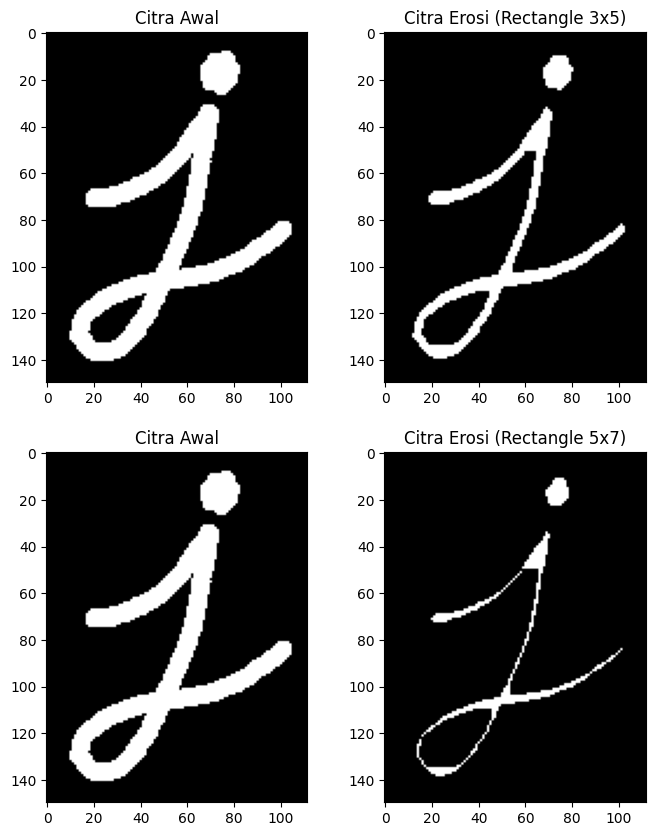

In [ ]:
image = cv.imread('/content/drive/MyDrive/Colab Notebooks/PCVK/images/j.png')
image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
img_fig, img_axs = plt.subplots(2, 2, figsize=(8, 10))

rectangle_3x5 = np.ones(shape=(3,5))
rectangle_5x7 = np.ones(shape=(5,7))

image = image > 0

print(rectangle_3x5, end='\n\n')
print(rectangle_5x7)

img_axs[0][0].imshow(image, cmap='gray')
img_axs[0][0].set_title('Citra Awal')

img_axs[0][1].set_title('Citra Erosi (Rectangle 3x5)')
res_erosi = erosi(image, rectangle_3x5 > 0)
img_axs[0][1].imshow(res_erosi, cmap='gray')

img_axs[1][0].set_title('Citra Awal')
img_axs[1][0].imshow(image, cmap='gray')

img_axs[1][1].set_title('Citra Erosi (Rectangle 5x7)')
res_erosi = erosi(image, rectangle_5x7 > 0)
img_axs[1][1].imshow(res_erosi, cmap='gray')

## Buatlah program implementasi operasi erosi dengan Structuring Element berbentuk Line Vertikal 3 dan 5

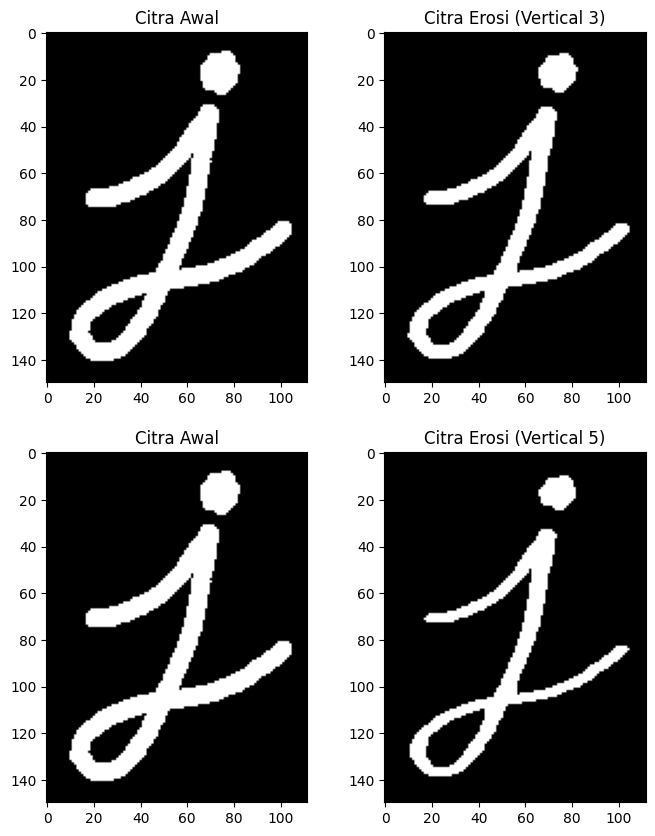

In [ ]:
image = cv.imread('/content/drive/MyDrive/Colab Notebooks/PCVK/images/j.png')
image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
img_fig, img_axs = plt.subplots(2, 2, figsize=(8, 10))

vertical_3 = np.ones(shape=(3,1))
vertical_5 = np.ones(shape=(5,1))

image = image > 0

# print(vertical_3, end='\n\n')
# print(vertical_5)

img_axs[0][0].imshow(image, cmap='gray')
img_axs[0][0].set_title('Citra Awal')

img_axs[0][1].set_title('Citra Erosi (Vertical 3)')
res_erosi = erosi(image, vertical_3 > 0)
img_axs[0][1].imshow(res_erosi, cmap='gray')

img_axs[1][0].set_title('Citra Awal')
img_axs[1][0].imshow(image, cmap='gray')

img_axs[1][1].set_title('Citra Erosi (Vertical 5)')
res_erosi = erosi(image, vertical_5 > 0)
img_axs[1][1].imshow(res_erosi, cmap='gray')